Lasso

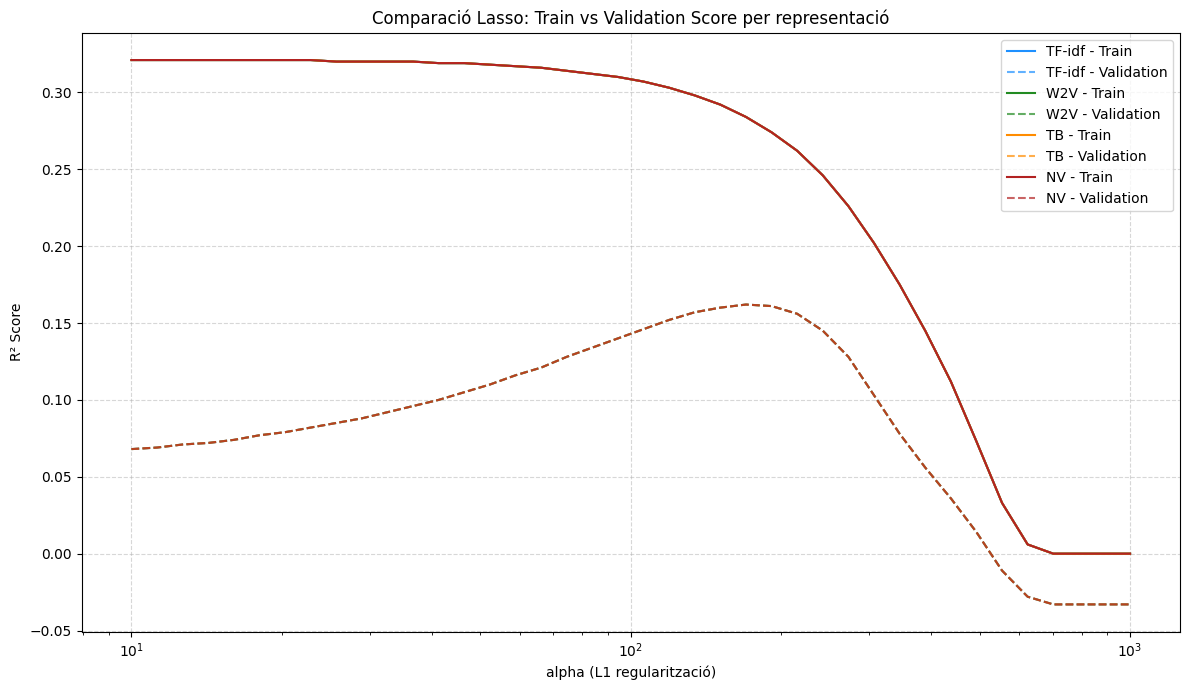

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Diccionari amb noms de fitxers i colors base
models = {
    'TF-idf': ('data/lasso_TF-idf.pkl', 'dodgerblue'),
    'W2V':    ('data/lasso_W2V.pkl',    'forestgreen'),
    'TB':     ('data/lasso_TB.pkl',     'darkorange'),
    'NV':     ('data/lasso_NV.pkl',     'firebrick')
}

plt.figure(figsize=(12, 7))

for name, (path, color) in models.items():
    df = pd.read_pickle(path)
    alpha = df['alpha']
    train = df['train_score_mean']
    val = df['val_score_mean']
    
    # Línia de train (més clara)
    plt.plot(alpha, train, label=f"{name} - Train", color=color, linestyle='-')
    
    # Línia de validació (mateix color, més fosc)
    plt.plot(alpha, val, label=f"{name} - Validation", color=color, linestyle='--', alpha=0.7)

plt.xscale('log')  # α normalment es representa millor en escala logarítmica
plt.xlabel('alpha (L1 regularització)')
plt.ylabel('R² Score')
plt.title('Comparació Lasso: Train vs Validation Score per representació')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('imatges/lasso_score_nt.png')
plt.show()


Ridge

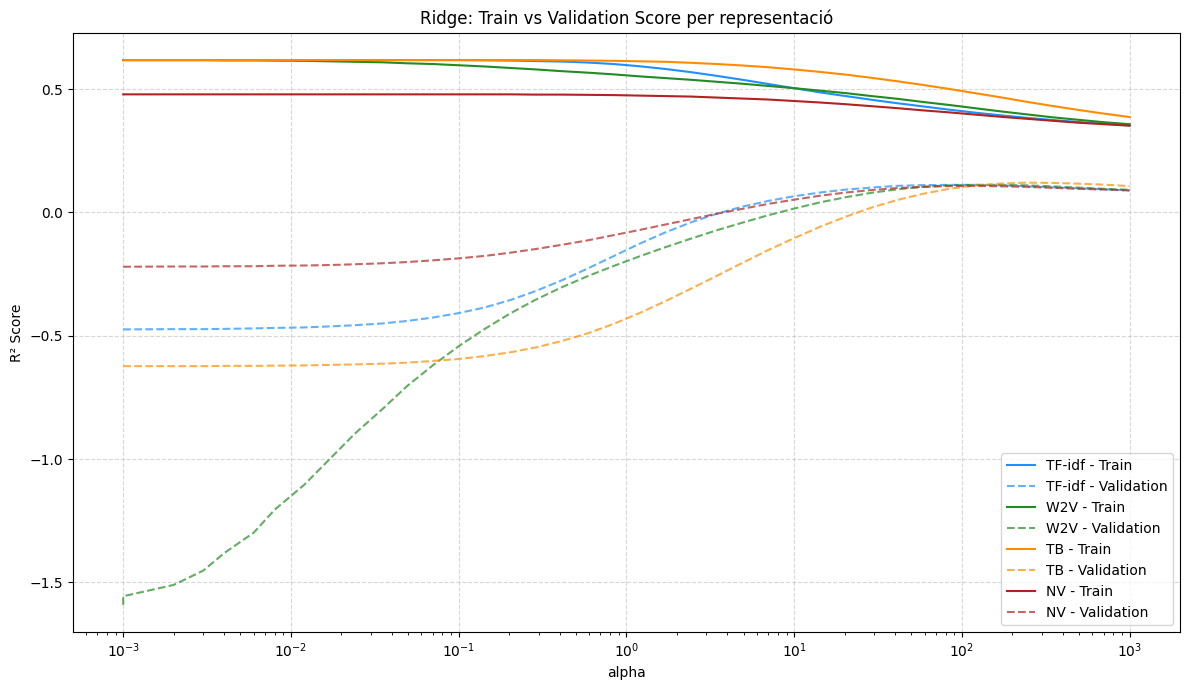

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Diccionari amb fitxers i colors
models = {
    'TF-idf': ('data/ridge_TF-idf.pkl', 'dodgerblue'),
    'W2V':    ('data/ridge_W2V.pkl',    'forestgreen'),
    'TB':     ('data/ridge_TB.pkl',     'darkorange'),
    'NV':     ('data/ridge_NV.pkl',     'firebrick')
}

# Contenidor per a val_score_mean
val_scores_by_model = {}

# Gràfic
plt.figure(figsize=(12, 7))

for name, (path, color) in models.items():
    df = pd.read_pickle(path)
    alpha = df['alpha']
    train = df['train_score_mean']
    val = df['val_score_mean']

    # Desa per test estadístic
    val_scores_by_model[name] = val

    # Línies de train i val
    plt.plot(alpha, train, label=f"{name} - Train", color=color, linestyle='-')
    plt.plot(alpha, val, label=f"{name} - Validation", color=color, linestyle='--', alpha=0.7)

plt.xscale('log')
plt.xlabel('alpha') 
plt.ylabel('R² Score')
plt.title('Ridge: Train vs Validation Score per representació')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('imatges/ridge_score_nt.png')

plt.show()


Random Forests

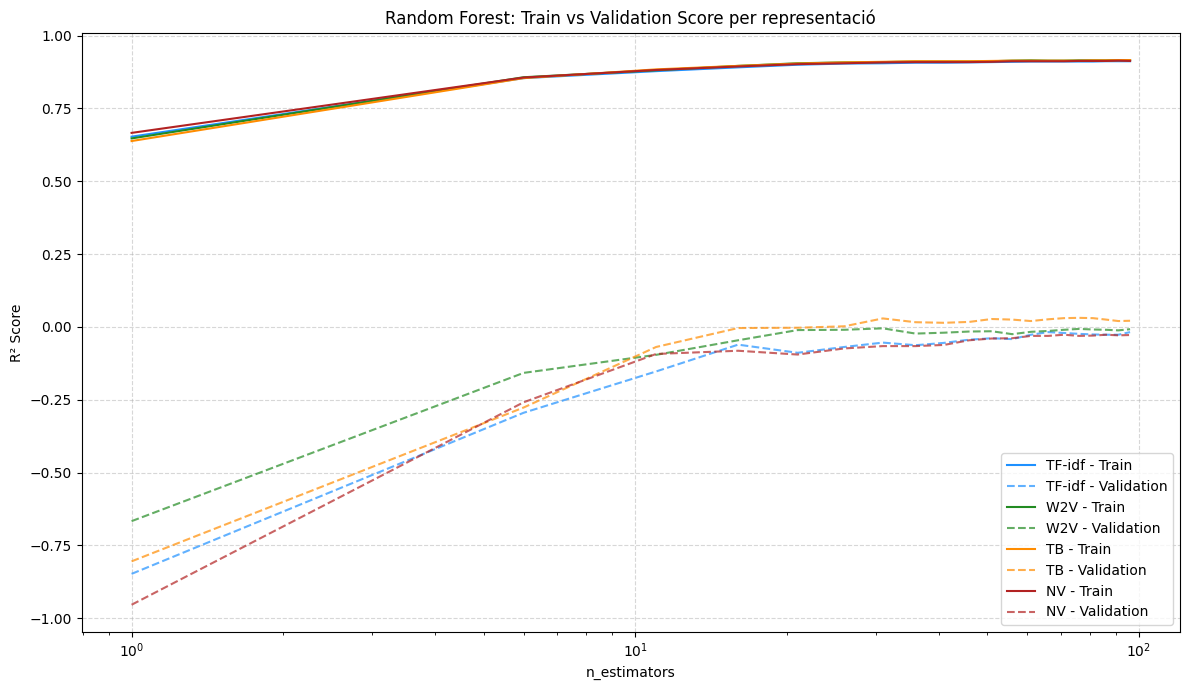

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Diccionari amb fitxers i colors
models = {
    'TF-idf': ('data/rf_TF-idf.pkl', 'dodgerblue'),
    'W2V':    ('data/rf_W2V.pkl',    'forestgreen'),
    'TB':     ('data/rf_TB.pkl',     'darkorange'),
    'NV':     ('data/rf_NV.pkl',     'firebrick')
}

# Contenidor per a val_score_mean
val_scores_by_model = {}

# Gràfic
plt.figure(figsize=(12, 7))

for name, (path, color) in models.items():
    df = pd.read_pickle(path)
    alpha = df['n_estimators']
    train = df['train_score_mean']
    val = df['val_score_mean']

    # Desa per test estadístic
    val_scores_by_model[name] = val

    # Línies de train i val
    plt.plot(alpha, train, label=f"{name} - Train", color=color, linestyle='-')
    plt.plot(alpha, val, label=f"{name} - Validation", color=color, linestyle='--', alpha=0.7)

plt.xscale('log')
plt.xlabel('n_estimators')
plt.ylabel('R² Score')
plt.title('Random Forest: Train vs Validation Score per representació')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('imatges/rf_score_nt.png')
plt.show()


XGBoost

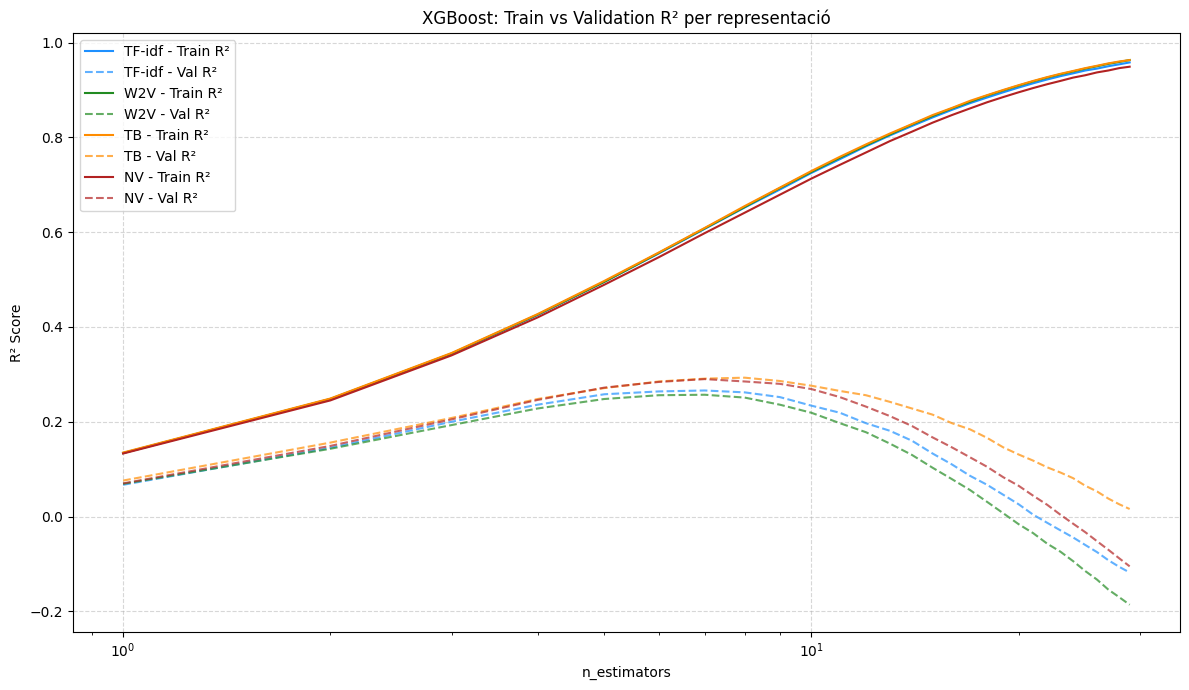

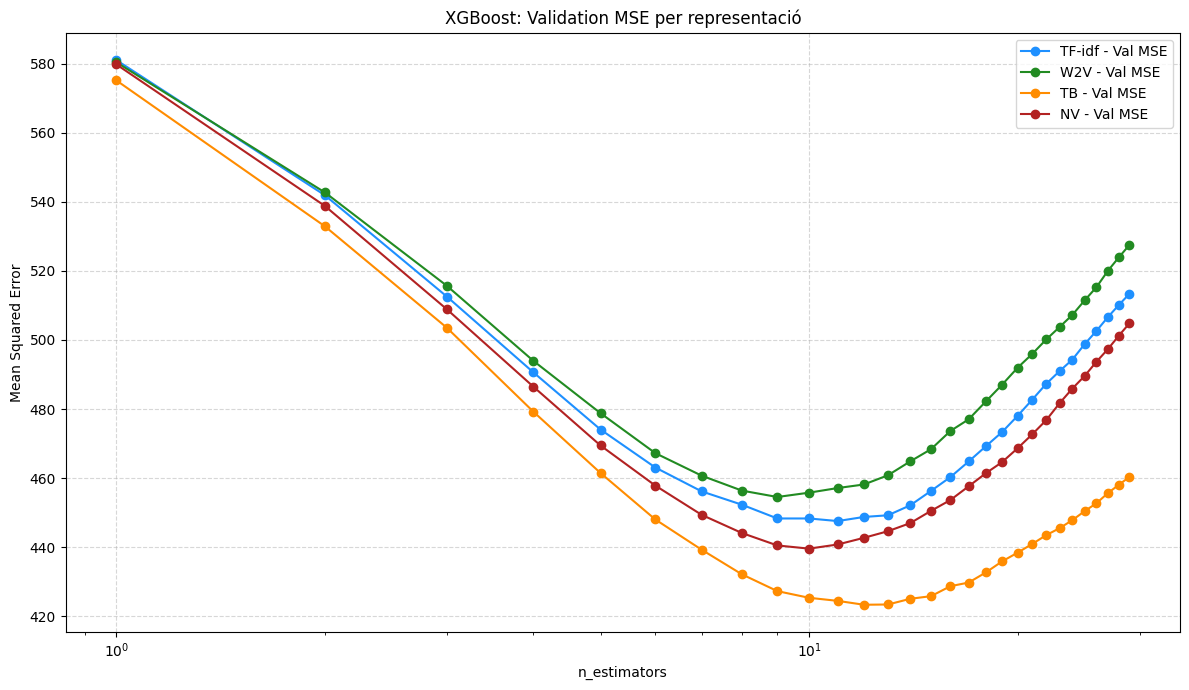

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Diccionari amb fitxers i colors
models = {
    'TF-idf': ('data/xgb_TF-idf.pkl', 'dodgerblue'),
    'W2V':    ('data/xgb_W2V.pkl',    'forestgreen'),
    'TB':     ('data/xgb_TB.pkl',     'darkorange'),
    'NV':     ('data/xgb_NV.pkl',     'firebrick')
}

val_scores_by_model = {}
val_mse_by_model = {}

# Gràfic 1: R² Score
plt.figure(figsize=(12, 7))
for name, (path, color) in models.items():
    df = pd.read_pickle(path)
    x_axis = df['n_estimators']
    train = df['train_score_mean']
    val = df['val_score_mean']

    val_scores_by_model[name] = val

    plt.plot(x_axis, train, label=f"{name} - Train R²", color=color, linestyle='-')
    plt.plot(x_axis, val, label=f"{name} - Val R²", color=color, linestyle='--', alpha=0.7)

plt.xscale('log')
plt.xlabel('n_estimators')
plt.ylabel('R² Score')
plt.title('XGBoost: Train vs Validation R² per representació')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('imatges/xgb_score_nt.png')
plt.show()

# Gràfic 2: MSE
plt.figure(figsize=(12, 7))
for name, (path, color) in models.items():
    df = pd.read_pickle(path)
    x_axis = df['n_estimators']
    val_mse = df['val_mse_mean']

    val_mse_by_model[name] = val_mse

    plt.plot(x_axis, val_mse, label=f"{name} - Val MSE", color=color, linestyle='-', marker='o')

plt.xscale('log')
plt.xlabel('n_estimators')
plt.ylabel('Mean Squared Error')
plt.title('XGBoost: Validation MSE per representació')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('imatges/xgb_mse_nt.png')
plt.show()

SVR

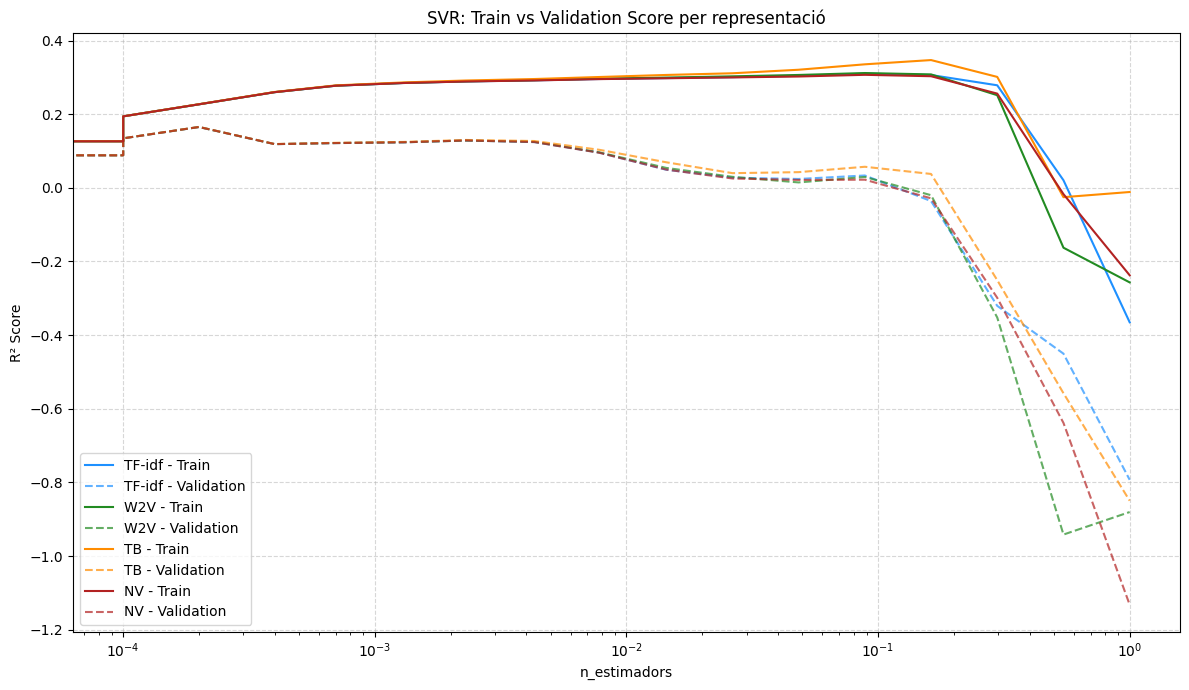

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Diccionari amb fitxers i colors
models = {
    'TF-idf': ('data/svr_TF-idf.pkl', 'dodgerblue'),
    'W2V':    ('data/svr_W2V.pkl',    'forestgreen'),
    'TB':     ('data/svr_TB.pkl',     'darkorange'),
    'NV':     ('data/svr_NV.pkl',     'firebrick')
}

# Contenidor per a val_score_mean
val_scores_by_model = {}

# Gràfic
plt.figure(figsize=(12, 7))

for name, (path, color) in models.items():
    df = pd.read_pickle(path)
    alpha = df['C']
    train = df['train_score_mean']
    val = df['val_score_mean']

    # Desa per test estadístic
    val_scores_by_model[name] = val

    # Línies de train i val
    plt.plot(alpha, train, label=f"{name} - Train", color=color, linestyle='-')
    plt.plot(alpha, val, label=f"{name} - Validation", color=color, linestyle='--', alpha=0.7)

plt.xscale('log')
plt.xlabel('n_estimadors')
plt.ylabel('R² Score')
plt.title('SVR: Train vs Validation Score per representació')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('imatges/svr_score_nt.png')
plt.show()
